In [1]:
import pandas as pd
df = pd.read_pickle("data/cpt_5min/k_data/BTCUSD.pkl")

In [2]:
import importlib
import technical_indicators  

importlib.reload(technical_indicators)

from technical_indicators import TechnicalIndicators

In [3]:
tech_indicators = TechnicalIndicators(df)
df_with_indicators = tech_indicators.get_tech_indicators()

In [4]:
df_with_indicators

,open,high,low,close,preclose,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,...,SMA_200,SMA_600,EMA_14,MACD,Signal_Line,Upper_BB,Lower_BB,%K,%D,RSI
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01 06:00:00,47190.56,47241.08,47119.92,47119.92,NaN,2.436750,1641017099999,114931.6736,153,0.57991700,...,NaN,NaN,47119.920000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2022-01-01 06:05:00,47115.80,47280.38,47108.32,47261.43,47119.92,1.418390,1641017399999,66979.3455,113,0.74723500,...,NaN,NaN,47138.788000,11.288547,2.257709,NaN,NaN,NaN,NaN,100.000000
2022-01-01 06:10:00,47260.56,47331.57,47249.63,47311.32,47261.43,1.963671,1641017699999,92861.0111,134,1.61761000,...,NaN,NaN,47161.792267,23.984035,6.602974,NaN,NaN,NaN,NaN,100.000000
2022-01-01 06:15:00,47298.17,47298.17,47190.28,47209.46,47311.32,2.039986,1641017999999,96429.3426,79,0.70107400,...,NaN,NaN,47168.147964,25.531736,10.388727,NaN,NaN,NaN,NaN,59.480919
2022-01-01 06:20:00,47208.81,47228.06,47169.77,47175.65,47209.46,0.207595,1641018299999,9797.1701,55,0.06055400,...,NaN,NaN,47169.148236,23.756268,13.062235,NaN,NaN,NaN,NaN,51.490395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 05:40:00,16541.60,16542.99,16541.58,16541.74,16543.07,0.171651,1672465499999,2839.4793,17,0.06466300,...,16712.172455,16930.706907,16545.210056,-2.835841,-3.177320,16553.055131,16536.055869,28.815733,33.347584,41.233703
2022-12-31 05:45:00,16543.04,16546.24,16538.06,16539.85,16541.74,9.187929,1672465799999,151989.7736,202,4.32608700,...,16712.033880,16930.607057,16544.495382,-3.028608,-3.147577,16552.969682,16535.526318,20.735357,28.017671,37.639404
2022-12-31 05:50:00,16539.85,16540.63,16537.96,16537.96,16539.85,0.300884,1672466099999,4976.3609,42,0.04388900,...,16711.894795,16930.506992,16543.623998,-3.295891,-3.177240,16553.135399,16534.811601,12.654981,20.735357,34.199621


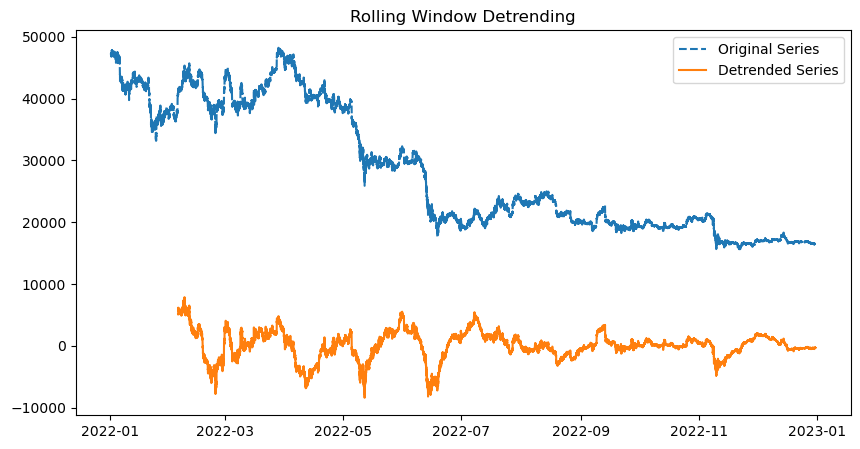

In [372]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

time_series = df_with_indicators['close'] #[:"2022-04-01"]

# 滚动窗口大小
window_size = 10000

# 初始化存储去趋势数据
detrended_series = pd.Series(index=time_series.index, dtype=float)

# 滚动窗口回归去趋势
for i in range(len(time_series) - window_size + 1):
    X_window = np.arange(window_size).reshape(-1, 1)
    y_window = time_series.iloc[i : i + window_size].values
    
    # 线性回归拟合局部趋势
    model = LinearRegression()
    model.fit(X_window, y_window)
    trend_window = model.predict(X_window)
    
    # 去趋势
    detrended_series.iloc[i + window_size - 1] = time_series.iloc[i + window_size - 1] - trend_window[-1]

# 填充前面的 NaN 值（因为窗口无法覆盖起始部分）
detrended_series = detrended_series.dropna()

# 可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(time_series, label="Original Series", linestyle="dashed")
plt.plot(detrended_series, label="Detrended Series")
plt.legend()
plt.title("Rolling Window Detrending")
plt.show()


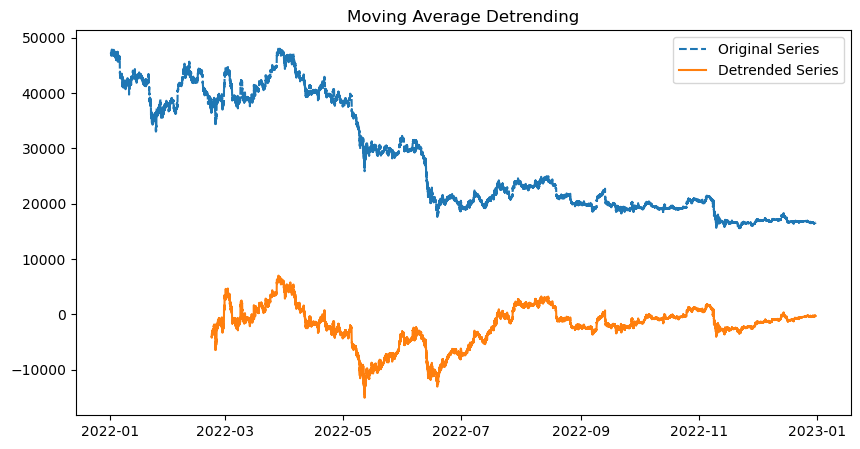

In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取时间序列数据
time_series = df_with_indicators['close']

# 选择滚动窗口大小
window_size = 15000  # 保持与原代码一致

# 计算移动平均
moving_avg = time_series.rolling(window=window_size).mean()

# 去趋势（原值 - 移动平均值）
detrended_series = time_series - moving_avg
detrended_series = detrended_series.dropna()

# 可视化
plt.figure(figsize=(10, 5))
plt.plot(time_series, label="Original Series", linestyle="dashed")
plt.plot(detrended_series, label="Detrended Series")
plt.legend()
plt.title("Moving Average Detrending")
plt.show()


In [401]:
def calculate_rsi(data, period=14):
    """Compute the Relative Strength Index (RSI) using EMA."""
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(span=period, adjust=False).mean()
    avg_loss = loss.ewm(span=period, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [402]:
data = pd.DataFrame()
data['RSI'] = calculate_rsi(detrended_series)

In [403]:
data['Signal_RSI'] = 0  
# Strategy 6: RSI Overbought/Oversold
data.loc[data['RSI'] < 10, 'Signal_RSI'] = 1  
data.loc[data['RSI'] > 90, 'Signal_RSI'] = -1  

In [404]:
data['close'] = df['close']

In [405]:
data

,RSI,Signal_RSI,close
date,,,
2022-02-22 08:25:00,NaN,0,37019.32
2022-02-22 08:30:00,0.000000,1,37005.63
2022-02-22 08:35:00,0.000000,1,37004.10
2022-02-22 08:40:00,0.000000,1,36995.94
2022-02-22 08:45:00,43.007440,0,37007.02
...,...,...,...
2022-12-31 05:40:00,42.953949,0,16541.74
2022-12-31 05:45:00,39.382697,0,16539.85
2022-12-31 05:50:00,35.940894,0,16537.96


In [406]:
import trading_signal  

importlib.reload(trading_signal)

from trading_signal import long_short_strategy
from trading_signal import long_only_strategy
from trading_signal import short_only_strategy

# Apply strategies
series_position_long_short = long_short_strategy(data['Signal_RSI'])
series_position_long_only = long_only_strategy(data['Signal_RSI'])
series_position_short_only = short_only_strategy(data['Signal_RSI'])

In [407]:
series_position_long_short

date
2022-02-22 08:25:00    0
2022-02-22 08:30:00    1
2022-02-22 08:35:00    1
2022-02-22 08:40:00    1
2022-02-22 08:45:00    0
                      ..
2022-12-31 05:40:00    0
2022-12-31 05:45:00    0
2022-12-31 05:50:00    0
2022-12-31 05:55:00    0
2022-12-31 06:00:00    0
Length: 89828, dtype: int64

In [413]:
import importlib
import metrics  

importlib.reload(metrics)

from metrics import evaluate_strategy
from metrics import calculate_cumulative_asset

In [414]:
df_result = calculate_cumulative_asset(data["close"], series_position_long_short)

In [415]:
df_result

,close,Position,Cumulative_Asset,Cash_Balance,Crypto_Holding
date,,,,,
2022-02-22 08:25:00,37019.32,0,10000.000000,10000.000000,0.000000
2022-02-22 08:30:00,37005.63,1,10000.000000,0.000000,10000.000000
2022-02-22 08:35:00,37004.10,1,9999.586549,0.000000,9999.586549
2022-02-22 08:40:00,36995.94,1,9997.381480,0.000000,9997.381480
2022-02-22 08:45:00,37007.02,0,10000.375619,10000.375619,0.000000
...,...,...,...,...,...
2022-12-31 05:40:00,16541.74,0,11958.772669,11958.772669,0.000000
2022-12-31 05:45:00,16539.85,0,11958.772669,11958.772669,0.000000
2022-12-31 05:50:00,16537.96,0,11958.772669,11958.772669,0.000000


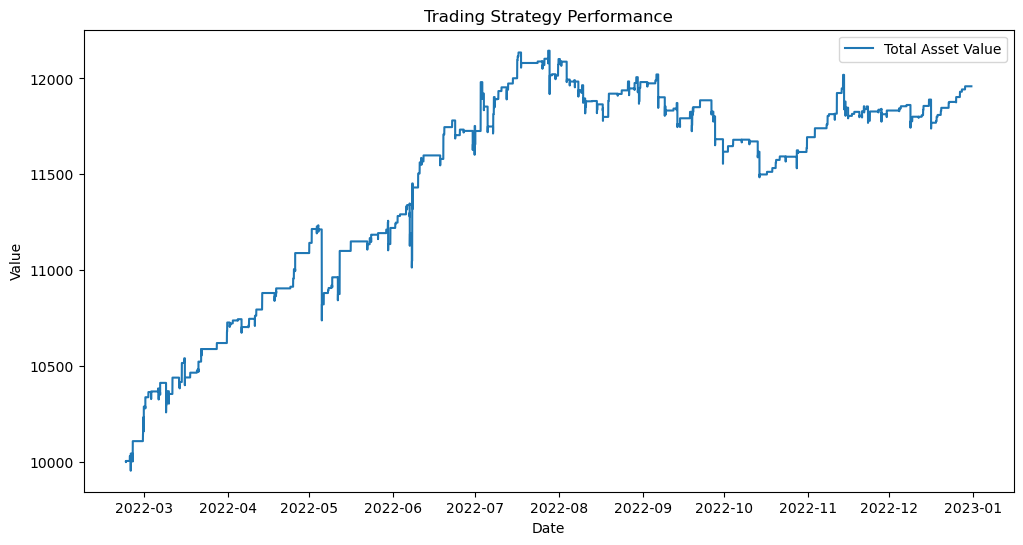

In [416]:
import matplotlib.pyplot as plt

# Plot Total Asset Value, Cash Balance, and Crypto Holdings Value
plt.figure(figsize=(12,6))

# Plot total asset value
plt.plot(df_result.index, df_result["Cumulative_Asset"], label="Total Asset Value")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Trading Strategy Performance")

# Show legend
plt.legend()

# Show the plot
plt.show()

In [417]:
evaluate_strategy(df_result, risk_free_rate=0.0)

{'Sharpe Ratio': 2.064832395709375,
 'Max Drawdown (%)': -5.440226793194997,
 'Holding Win Rate (%)': 0.34287749922073296,
 'Trading Win Rate (%)': 70.47970479704797,
 'Final Cumulative Return (%)': 19.58772669367226}

In [412]:
evaluate_strategy(df_result, risk_free_rate=0.0)

{'Sharpe Ratio': 1.4612608255779012,
 'Max Drawdown (%)': -6.9077092130340665,
 'Holding Win Rate (%)': 0.4619940330409226,
 'Trading Win Rate (%)': 66.42066420664207,
 'Final Cumulative Return (%)': 13.120082137543342}

In [384]:
evaluate_strategy(df_result, risk_free_rate=0.0)

{'Sharpe Ratio': 1.2598351851403122,
 'Max Drawdown (%)': -7.420806664321877,
 'Holding Win Rate (%)': 0.4471253216349601,
 'Trading Win Rate (%)': 67.26618705035972,
 'Final Cumulative Return (%)': 11.457175372578}

In [360]:
evaluate_strategy(df_result, risk_free_rate=0.0)

{'Sharpe Ratio': 1.3434465589738391,
 'Max Drawdown (%)': -7.989516630582588,
 'Holding Win Rate (%)': 0.45531460123792133,
 'Trading Win Rate (%)': 65.78947368421053,
 'Final Cumulative Return (%)': 11.874258513163571}

In [371]:
evaluate_strategy(df_result, risk_free_rate=0.0)

{'Sharpe Ratio': 1.3422111677845237,
 'Max Drawdown (%)': -7.6549479345070175,
 'Holding Win Rate (%)': 0.4378642906884677,
 'Trading Win Rate (%)': 65.90163934426229,
 'Final Cumulative Return (%)': 13.423590407521125}

In [333]:
evaluate_strategy(df_result, risk_free_rate=0.0)

{'Sharpe Ratio': 1.2097010746866903,
 'Max Drawdown (%)': -7.125557453755042,
 'Holding Win Rate (%)': 0.4693790647259213,
 'Trading Win Rate (%)': 67.62820512820514,
 'Final Cumulative Return (%)': 11.81223403212963}

In [300]:
df_result["Buy_Signal"] = (df_result["Position"] == 1) & (df_result["Position"].shift(-1) == 1)

In [301]:
df_result

,close,Position,Cumulative_Asset,Cash_Balance,Crypto_Holding,Buy_Signal
date,,,,,,
2022-01-06 10:55:00,42842.70,0,10000.000000,10000.000000,0.000000,False
2022-01-06 11:00:00,42900.36,-1,10000.000000,20000.000000,-10000.000000,False
2022-01-06 11:05:00,42887.51,-1,10002.995313,20000.000000,-9997.004687,False
2022-01-06 11:10:00,42932.75,-1,9992.449947,20000.000000,-10007.550053,False
2022-01-06 11:15:00,42915.59,0,9996.449913,9996.449913,0.000000,False
...,...,...,...,...,...,...
2022-04-01 23:35:00,46212.94,0,10785.356150,10785.356150,0.000000,False
2022-04-01 23:40:00,46226.99,0,10785.356150,10785.356150,0.000000,False
2022-04-01 23:45:00,46280.68,0,10785.356150,10785.356150,0.000000,False


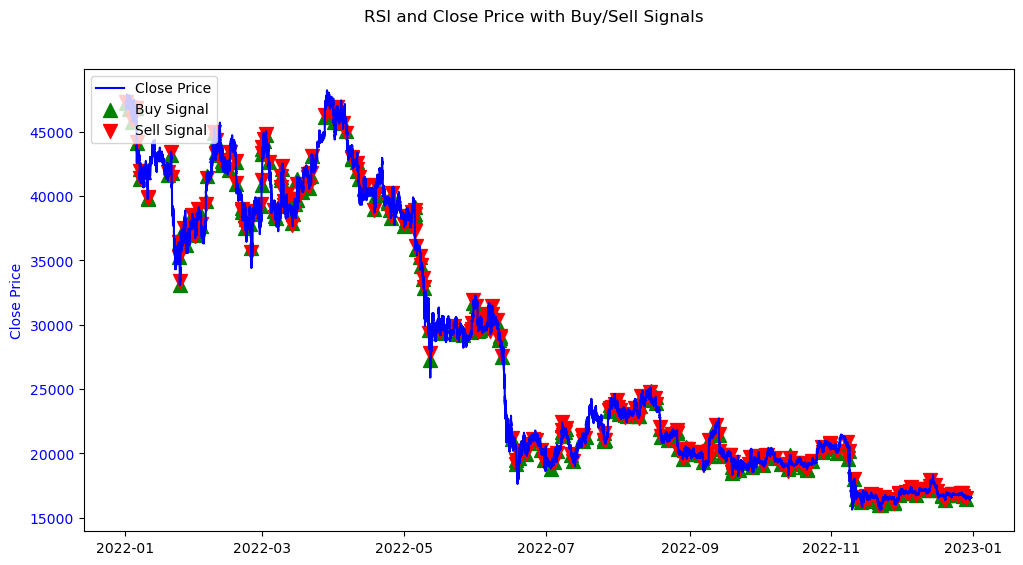

In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Close Price
ax1.plot(df_result.index, df_result["close"], color="blue", label="Close Price")
ax1.set_ylabel("Close Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

df_result["Buy_Signal"] = (df_result["Position"].diff() > 0)
df_result["Sell_Signal"] = (df_result["Position"].diff() < 0)

# Buy/Sell signals
ax1.scatter(df_result.index[df_result["Buy_Signal"]], df_result["close"][df_result["Buy_Signal"]], 
            marker="^", color="green", label="Buy Signal", s=100)
ax1.scatter(df_result.index[df_result["Sell_Signal"]], df_result["close"][df_result["Sell_Signal"]], 
            marker="v", color="red", label="Sell Signal", s=100)

# Create second y-axis for RSI
# ax2 = ax1.twinx()
# ax2.plot(df_result.index, df_result["RSI"], linestyle="dashed", color="purple", label="RSI")
# ax2.axhline(70, linestyle="dashed", color="red", label="Overbought (70)")
# ax2.axhline(30, linestyle="dashed", color="green", label="Oversold (30)")
# ax2.set_ylabel("RSI", color="purple")
# ax2.tick_params(axis="y", labelcolor="purple")

# Legends and Title
fig.suptitle("RSI and Close Price with Buy/Sell Signals")
ax1.legend(loc="upper left")
# ax2.legend(loc="upper right")

plt.show()


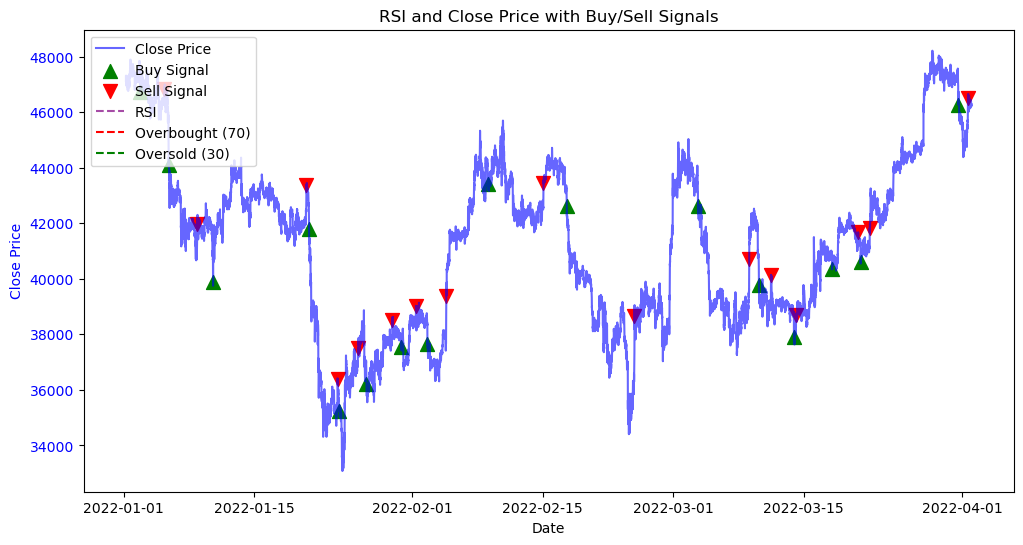

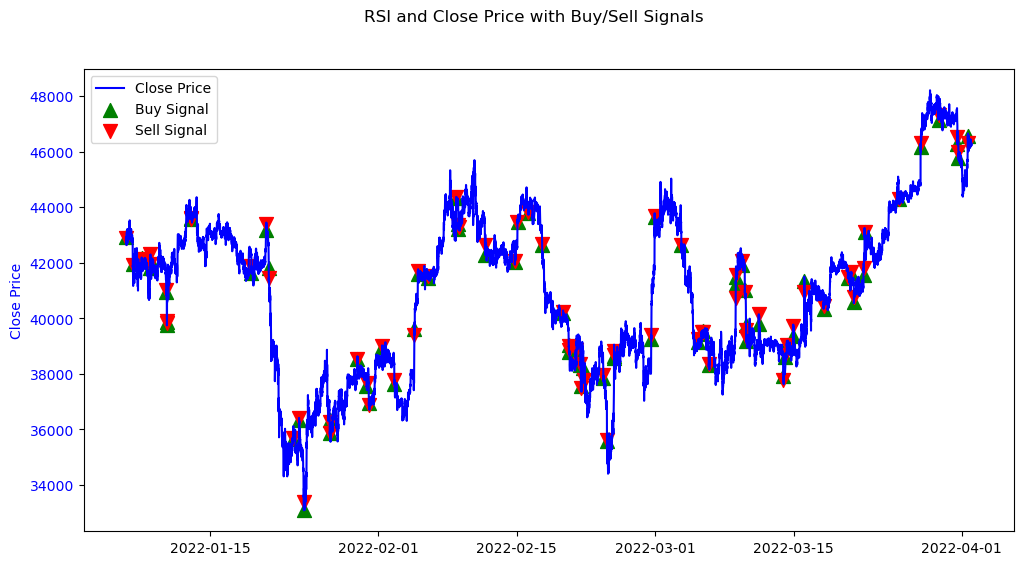

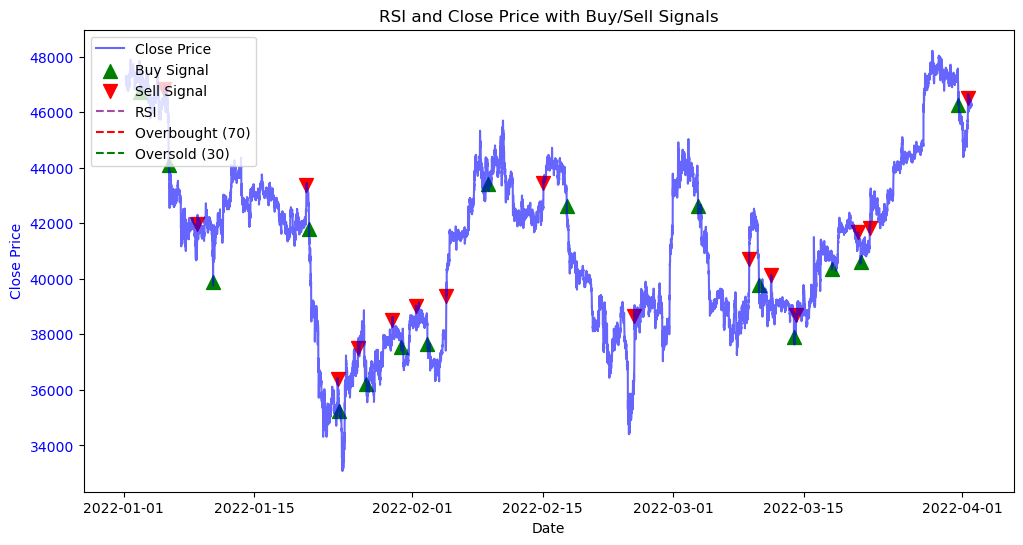

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_rsi(data, period=14):
    """Compute the Relative Strength Index (RSI) using EMA."""
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(span=period, adjust=False).mean()
    avg_loss = loss.ewm(span=period, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def backtest_rsi(data, period=14, rsi_buy=10, rsi_sell=90, initial_cash=10000):
    """Backtest an RSI strategy and record buy/sell points."""
    data = data.copy()
    data["RSI"] = calculate_rsi(data["close"], period)
    
    cash = initial_cash
    position = 0
    portfolio = []
    buy_signals = []
    sell_signals = []

    for i in range(len(data)):
        price = data["close"].iloc[i]
        rsi = data["RSI"].iloc[i]

        if rsi < rsi_buy and cash > 0:  # Buy condition
            position = cash / price
            cash = 0
            buy_signals.append((data.index[i], price))
        elif rsi > rsi_sell and position > 0:  # Sell condition
            cash = position * price
            position = 0
            sell_signals.append((data.index[i], price))

        portfolio_value = cash + (position * price)  # Track portfolio value
        portfolio.append(portfolio_value)

    data["Portfolio"] = portfolio
    return data, buy_signals, sell_signals

# Load the data
data = df.copy()

data = data[:'2022-4-01']

# Run the RSI backtest
result, buy_signals, sell_signals = backtest_rsi(data)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot the closing price
ax1.plot(result.index, result["close"], label="Close Price", color="blue", alpha=0.6)
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Plot buy/sell signals (only one legend entry for each)
if buy_signals:
    ax1.scatter(*zip(*buy_signals), marker="^", color="green", label="Buy Signal", s=100)
if sell_signals:
    ax1.scatter(*zip(*sell_signals), marker="v", color="red", label="Sell Signal", s=100)

# # Add a secondary y-axis for RSI
# ax2 = ax1.twinx()
# ax2.plot(result.index, result["RSI"], label="RSI", linestyle="dashed", color="purple", alpha=0.7)
# ax2.axhline(70, linestyle="--", color="red", label="Overbought (70)")
# ax2.axhline(30, linestyle="--", color="green", label="Oversold (30)")
# ax2.set_ylabel("RSI", color="purple")
# ax2.tick_params(axis='y', labelcolor="purple")

# Merge legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()

# Keep only one legend entry for Buy and Sell signals
legend_labels = {}
for handle, label in zip(handles1 + handles2, labels1 + labels2):
    if label not in legend_labels:
        legend_labels[label] = handle

ax1.legend(legend_labels.values(), legend_labels.keys(), loc="upper left")

plt.title("RSI and Close Price with Buy/Sell Signals")
plt.show()